## Synchronize time series using cross-correlation in Python

## Introduction

Cross correlation is a method used to measure the relationship between two time series by calculating the correlation of one series with lagged versions of the other. This helps identify how two variables are related across different times and can reveal if changes in one are related to changes in the other after a certain time period, known as "lag." Using cross correlation, we can detect timing differences and establish cause-and-effect relationships between events in various fields such as economics, meteorology, and engineering. It’s particularly useful for finding the best lag that maximizes the correlation, indicating when the effects of one variable are most strongly felt in another.

## Mathematical Formula

The formula for calculating the cross correlation between two discrete time series $x_t$ and $y_t$ at different lags ($\tau$) is expressed as:

$$ R_{xy}(\tau) = \sum_{t=1}^{N-\tau} (x_{t+\tau} - \overline{x})(y_t - \overline{y}) $$

Where:
- $R_{xy}(\tau)$ is the cross-correlation function for lag $\tau$,
- $x_t$ and $y_t$ are the values of the two time series at time $t$,
- $\overline{x}$ and $\overline{y}$ are the means of the respective time series,
- $N$ is the number of observations in the time series (assuming both series are of equal length),
- $\tau$ represents the lag, and can be positive, negative, or zero.

## Purpose

Using cross correlation, we can find the best lag that maximizes the correlation between two time series. This optimal lag indicates when the effects of one variable are most strongly observed in the other, thus providing insights that can guide decision-making in real-world applications.

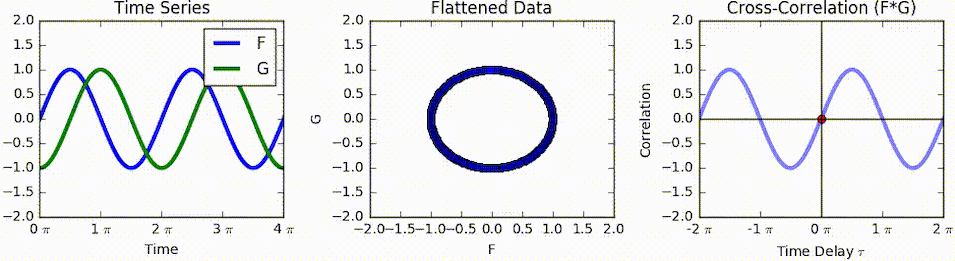

In [1]:
from IPython.display import Image, display

# Display the GIF
display(Image(filename='1_ycQxkcihyo7J4RuE0yB2cg.gif'))

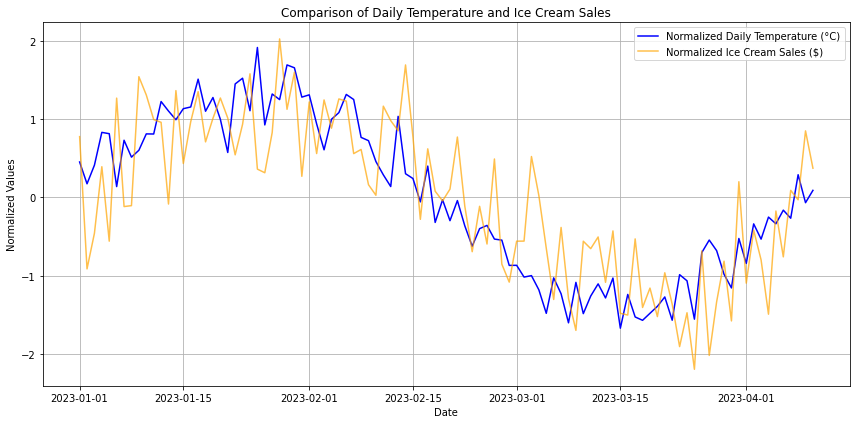

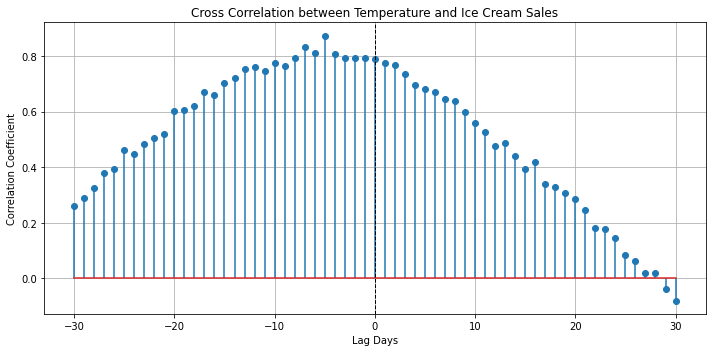

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
days = pd.date_range(start='2023-01-01', periods=100, freq='D')
temperatures = 20 + 10 * np.sin(np.linspace(0, 2 * np.pi, 100)) + np.random.normal(0, 2, 100)
sales = np.roll(temperatures, shift=5) * 10 + np.random.normal(0, 50, 100)  # Sales peak 5 days after temperatures

# Create DataFrame
data = pd.DataFrame({'Date': days, 'Temperature': temperatures, 'Sales': sales})
data.set_index('Date', inplace=True)

# Normalize data for better comparison
data['Normalized Temperature'] = (data['Temperature'] - data['Temperature'].mean()) / data['Temperature'].std()
data['Normalized Sales'] = (data['Sales'] - data['Sales'].mean()) / data['Sales'].std()

# Plot time series data on the same graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Normalized Temperature'], label='Normalized Daily Temperature (°C)', color='blue')
plt.plot(data.index, data['Normalized Sales'], label='Normalized Ice Cream Sales ($)', color='orange', alpha=0.7)
plt.title('Comparison of Daily Temperature and Ice Cream Sales')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot cross correlation
lags = np.arange(-30, 31, 1)
cross_corr = [data['Normalized Temperature'].corr(data['Normalized Sales'].shift(lag)) for lag in lags]

plt.figure(figsize=(10, 5))
plt.stem(lags, cross_corr, use_line_collection=True)
plt.title('Cross Correlation between Temperature and Ice Cream Sales')
plt.xlabel('Lag Days')
plt.ylabel('Correlation Coefficient')
plt.axvline(x=0, color='k', linestyle='--', lw=1)
plt.grid(True)
plt.tight_layout()
plt.show()

Maximum Correlation: 0.8730469020719729, at Lag: -5


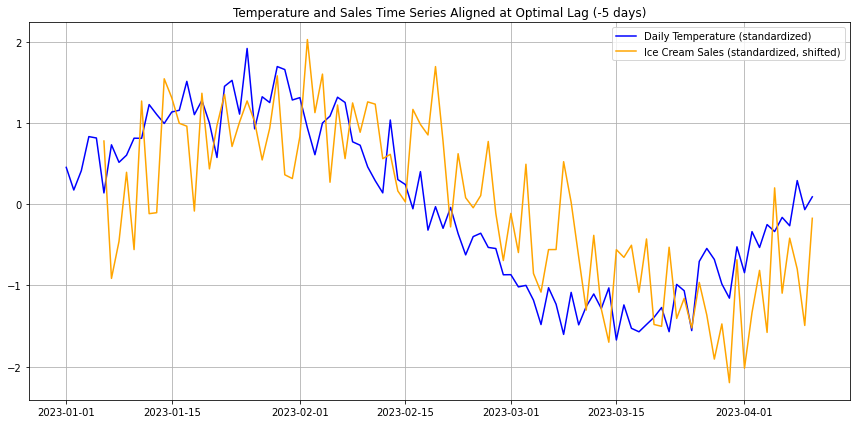

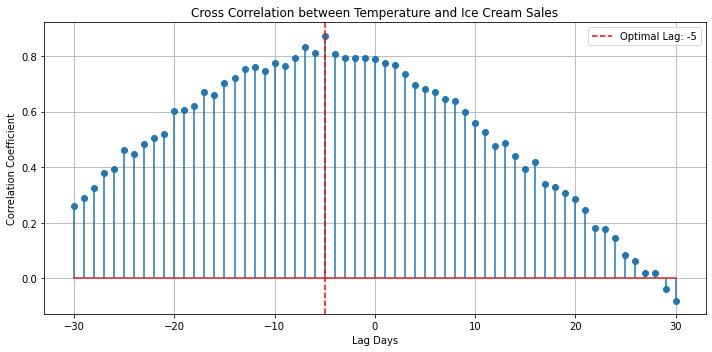

In [7]:
# Calculate cross correlation
lags = np.arange(-30, 31, 1)
cross_corr = [data['Temperature'].corr(data['Sales'].shift(lag)) for lag in lags]

# Find maximum correlation and corresponding lag
max_corr = np.max(cross_corr)
optimal_lag = lags[np.argmax(cross_corr)]
print(f"Maximum Correlation: {max_corr}, at Lag: {optimal_lag}")

# Plot the original and shifted series at optimal lag
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Temperature'], label='Daily Temperature (standardized)', color='blue')
plt.plot(data.index, data['Sales'].shift(-optimal_lag), label='Ice Cream Sales (standardized, shifted)', color='orange')
plt.title(f"Temperature and Sales Time Series Aligned at Optimal Lag ({optimal_lag} days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot cross correlation
plt.figure(figsize=(10, 5))
plt.stem(lags, cross_corr, use_line_collection=True)
plt.title('Cross Correlation between Temperature and Ice Cream Sales')
plt.xlabel('Lag Days')
plt.ylabel('Correlation Coefficient')
plt.axvline(x=optimal_lag, color='red', linestyle='--', label=f"Optimal Lag: {optimal_lag}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
len(data['Temperature'])

100

In [15]:
# Calculate correlation at lag of -5
correlation_matrix = np.corrcoef(data['Temperature'][:95], data['Sales'][5:])
max_correlation = correlation_matrix[0, 1]  # This extracts the correlation coefficient from the matrix

print("Correlation at lag -5:", max_correlation)

Correlation at lag -5: 0.8730469020719729




     END